In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Get the overall info from the dataset


In [3]:
## Read the dataset from CSV file

city_df = pd.read_csv("textdata/Philadelphia-dataset.csv")



In [4]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 1373 non-null   object 
 1   created_at                  1375 non-null   object 
 2   hashtags                    871 non-null    object 
 3   media                       30 non-null     object 
 4   urls                        1343 non-null   object 
 5   favorite_count              1375 non-null   int64  
 6   id                          1375 non-null   int64  
 7   in_reply_to_screen_name     13 non-null     object 
 8   in_reply_to_status_id       6 non-null      float64
 9   in_reply_to_user_id         13 non-null     float64
 10  lang                        1375 non-null   object 
 11  place                       1373 non-null   object 
 12  possibly_sensitive          1359 non-null   object 
 13  retweet_count               1375 

In [5]:
city_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-75.22392,39.94811",Wed Mar 25 15:29:09 +0000 2020,Frustrated Urrrgh DamnYouCOVID19,NaN,https://www.instagram.com/p/B-KWLo2KAQXRstVrea...,0,1242835921185247233,NaN,NaN,NaN,...,890,662,64,"Philadelphia, PA","Nafesa E, MS, HS-BCP",SoulfulZeta,19996,NaN,http://Facebook.com/PhillySoulFes,False
1,"-75.15347844,40.04876282",Sat Mar 28 22:03:41 +0000 2020,coronaviruscutz corona coronaviruspandemic wic...,NaN,https://www.instagram.com/p/B-SxvGLBcsn/?igshi...,0,1244022372459569152,NaN,NaN,NaN,...,14,1,0,NaN,Brian Walker,Briaheemdadream,844,NaN,NaN,False
2,"-75.3716,40.1018",Sun Mar 22 10:41:26 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-CG5BZpnFX/?igshi...,0,1241676353017126913,NaN,NaN,NaN,...,172,476,3,"Coast to Coast, baby",Amber Browning-Coyle,abccoasttocoast,893,NaN,http://SpotlightOnGiving.com,False
3,"-74.99811554,39.91350555",Sun Mar 22 21:01:31 +0000 2020,puzzle puzzles puzzlesofinstagram jigsawpuzzle...,NaN,https://www.instagram.com/p/B-DN2xdA6IK/?igshi...,0,1241832404035211267,NaN,NaN,NaN,...,488,2169,24,"Cherry Hill, New Jersey, USA",Lou Schopfer,SchopferL,35805,NaN,https://about.me/schopfer,False
4,"-75.16323161,39.98944055",Wed Apr 01 21:15:55 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-c_c-Hgp5r/?igshi...,0,1245459905244475395,NaN,NaN,NaN,...,1214,1158,53,"Philadelphia, PA",Willow Ford 213,KN_Butler,6007,NaN,http://www.farbackroom.com,False


In [6]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = city_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = city_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = city_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = city_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [7]:
df_text.head(10)    

,text,created_at,place,hashtags
0,Hair two weeks ago. The maintenance halted bec...,Wed Mar 25 15:29:09 +0000 2020,"Philadelphia, PA",Frustrated Urrrgh DamnYouCOVID19
1,#coronaviruscutz #corona #coronaviruspandemic ...,Sat Mar 28 22:03:41 +0000 2020,"Philadelphia, PA",coronaviruscutz corona coronaviruspandemic wic...
2,Read This!!!FROM A DEAR TRUSTED FRIEND WHOSE D...,Sun Mar 22 10:41:26 +0000 2020,"King of Prussia, PA",<NA>
3,The puzzle master Jan Schopfer @ work #2000 pi...,Sun Mar 22 21:01:31 +0000 2020,"Barclay, NJ",puzzle puzzles puzzlesofinstagram jigsawpuzzle...
4,This is how I've been keeping my cool as an es...,Wed Apr 01 21:15:55 +0000 2020,"Philadelphia, PA",<NA>
5,Dear #corona please let us alone! We miss all ...,Tue Mar 24 16:08:49 +0000 2020,"Philadelphia, PA",corona
6,There’s toilet paper rolls to win in THIS cran...,Fri Apr 03 23:36:27 +0000 2020,"Folsom, PA",cranegame whytoiletpaper toiletpaper covid2020...
7,If only a selfie a day could keep the corona a...,Fri Apr 03 23:06:31 +0000 2020,"Stratford, NJ",<NA>
8,Zoom in to check out our great selection of ta...,Fri Mar 20 14:45:24 +0000 2020,"Pennsylvania, USA",openfortakeout beertogo staysafe corona sucks
9,It was great to play some music with my oldest...,Sat Mar 21 01:09:13 +0000 2020,"Philadelphia, PA",tangled disney iseethelight music corona quara...


## Cleaning the text Data

In [8]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [9]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [10]:
df_text.head(2)

,text,created_at,place,hashtags
0,Hair two weeks ago The maintenance halted beca...,Wed Mar 25 15:29:09 +0000 2020,"Philadelphia, PA",Frustrated Urrrgh DamnYouCOVID19
1,coronaviruscutz corona coronaviruspandemic wi...,Sat Mar 28 22:03:41 +0000 2020,"Philadelphia, PA",coronaviruscutz corona coronaviruspandemic wic...


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [11]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
df_text.head(10)


,text,created_at,place,hashtags,subjectivity,polarity
0,Hair two weeks ago The maintenance halted beca...,Wed Mar 25 15:29:09 +0000 2020,"Philadelphia, PA",Frustrated Urrrgh DamnYouCOVID19,0.150000,-0.316667
1,coronaviruscutz corona coronaviruspandemic wi...,Sat Mar 28 22:03:41 +0000 2020,"Philadelphia, PA",coronaviruscutz corona coronaviruspandemic wic...,1.000000,-0.250000
2,Read ThisFROM A DEAR TRUSTED FRIEND WHOSE DEAR...,Sun Mar 22 10:41:26 +0000 2020,"King of Prussia, PA",<NA>,0.900000,0.500000
3,The puzzle master Jan Schopfer work piece pu...,Sun Mar 22 21:01:31 +0000 2020,"Barclay, NJ",puzzle puzzles puzzlesofinstagram jigsawpuzzle...,0.000000,0.000000
4,This is how Ive been keeping my cool as an ess...,Wed Apr 01 21:15:55 +0000 2020,"Philadelphia, PA",<NA>,0.325000,-0.025000
5,Dear corona please let us alone We miss all of...,Tue Mar 24 16:08:49 +0000 2020,"Philadelphia, PA",corona,0.000000,0.000000
6,Theres toilet paper rolls to win in THIS crane...,Fri Apr 03 23:36:27 +0000 2020,"Folsom, PA",cranegame whytoiletpaper toiletpaper covid2020...,0.200000,0.383333
7,If only a selfie a day could keep the corona a...,Fri Apr 03 23:06:31 +0000 2020,"Stratford, NJ",<NA>,0.727273,0.068182
8,Zoom in to check out our great selection of ta...,Fri Mar 20 14:45:24 +0000 2020,"Pennsylvania, USA",openfortakeout beertogo staysafe corona sucks,0.683333,0.333333
9,It was great to play some music with my oldest...,Sat Mar 21 01:09:13 +0000 2020,"Philadelphia, PA",tangled disney iseethelight music corona quara...,0.750000,0.800000


In [12]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_philadelphia.csv")

## Make a WordCloud chart -word frequency map

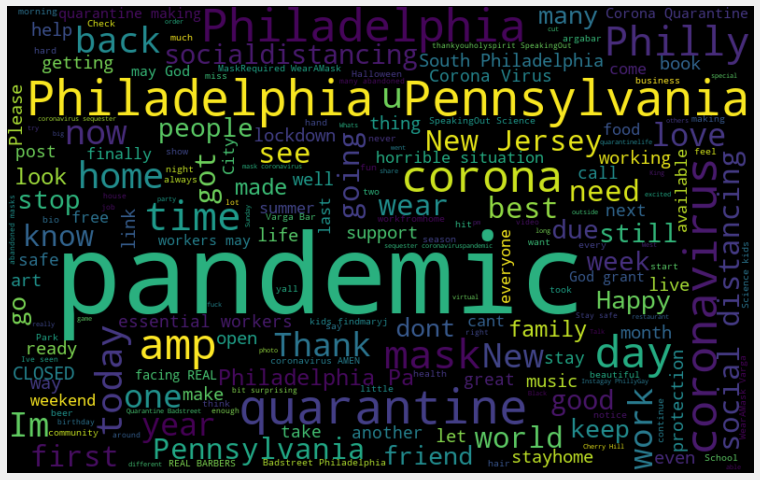

In [13]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [18]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [19]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Negative'):
#       #  print(str(j)+ ')' + sortedDF_text['text'][i])
#         print()  #to print uncomment
#       #  j = j+1

## All Positive Tweets

In [20]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Positive'):
#        # print(str(j)+ ')' + sortedDF_text['text'][i])
#         print()
#         j = j+1

## Scatter pLot - map the postitive-negative distribution

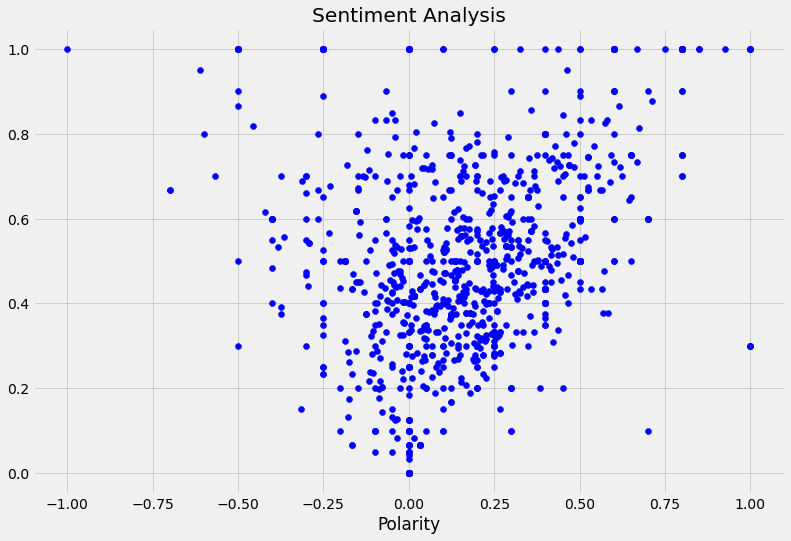

In [21]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [22]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 54.9 %


In [23]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 16.3 %


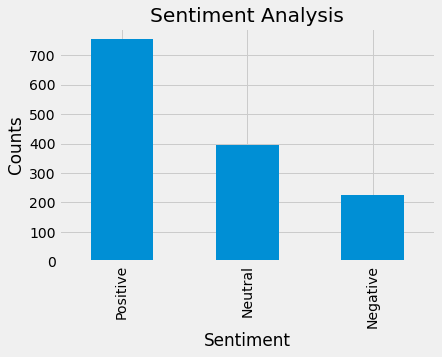

In [24]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [25]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [26]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [27]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,Hair two weeks ago The maintenance halted beca...,Wed Mar 25 15:29:09 +0000 2020,"Philadelphia, PA",Frustrated Urrrgh DamnYouCOVID19,0.15,-0.316667,Negative,"[Hair, two, weeks, ago, The, maintenance, halt..."


In [28]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,hair two weeks ago the maintenance halted beca...,wed mar 25 15:29:09 +0000 2020,"philadelphia, pa",frustrated urrrgh damnyoucovid19,0.15,-0.31666666666666665,negative,"['hair', 'two', 'weeks', 'ago', 'the', 'mainte..."


## B.2 Apply Filters - Find/Remove Stopwords

In [29]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [30]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [31]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [32]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,hair two weeks ago the maintenance halted beca...,wed mar 25 15:29:09 +0000 2020,"philadelphia, pa",frustrated urrrgh damnyoucovid19,0.15,-0.31666666666666665,negative,"[hair, two, weeks, ago, , maintenance, halted,..."
1,coronaviruscutz corona coronaviruspandemic wi...,sat mar 28 22:03:41 +0000 2020,"philadelphia, pa",coronaviruscutz corona coronaviruspandemic wic...,1.0,-0.25,negative,"[coronaviruscutz, corona, coronaviruspandemic,..."


## B.2 Apply Filters - stemming words

In [33]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [34]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [35]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,hair two weeks ago the maintenance halted beca...,wed mar 25 15:29:09 +0000 2020,"philadelphia, pa",frustrated urrrgh damnyoucovid19,0.15,-0.31666666666666665,negative,"[hair, two, week, ago, , mainten, halt, , , co..."
1,coronaviruscutz corona coronaviruspandemic wi...,sat mar 28 22:03:41 +0000 2020,"philadelphia, pa",coronaviruscutz corona coronaviruspandemic wic...,1.0,-0.25,negative,"[coronaviruscutz, corona, coronaviruspandem, w..."


## Return the cleaned data into a sentence format

In [36]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,hair two weeks ago the maintenance halted beca...,wed mar 25 15:29:09 +0000 2020,"philadelphia, pa",frustrated urrrgh damnyoucovid19,0.15,-0.31666666666666665,negative,hair two week ago mainten halt corona day ...
1,coronaviruscutz corona coronaviruspandemic wi...,sat mar 28 22:03:41 +0000 2020,"philadelphia, pa",coronaviruscutz corona coronaviruspandemic wic...,1.0,-0.25,negative,coronaviruscutz corona coronaviruspandem wicke...
2,read thisfrom a dear trusted friend whose dear...,sun mar 22 10:41:26 +0000 2020,"king of prussia, pa",<na>,0.9,0.5,positive,read thisfrom dear trust friend whose dear fr...
3,the puzzle master jan schopfer work piece pu...,sun mar 22 21:01:31 +0000 2020,"barclay, nj",puzzle puzzles puzzlesofinstagram jigsawpuzzle...,0.0,0.0,neutral,puzzl master jan schopfer work piec puzzl puz...
4,this is how ive been keeping my cool as an ess...,wed apr 01 21:15:55 +0000 2020,"philadelphia, pa",<na>,0.325,-0.02500000000000001,negative,ive keep cool essenti employe coronac...
5,dear corona please let us alone we miss all of...,tue mar 24 16:08:49 +0000 2020,"philadelphia, pa",corona,0.0,0.0,neutral,dear corona pleas let us alon miss support...
6,theres toilet paper rolls to win in this crane...,fri apr 03 23:36:27 +0000 2020,"folsom, pa",cranegame whytoiletpaper toiletpaper covid2020...,0.2,0.38333333333333336,positive,there toilet paper roll win crane cranegam ...
7,if only a selfie a day could keep the corona a...,fri apr 03 23:06:31 +0000 2020,"stratford, nj",<na>,0.7272727272727273,0.06818181818181818,positive,selfi day could keep corona away stratfor...
8,zoom in to check out our great selection of ta...,fri mar 20 14:45:24 +0000 2020,"pennsylvania, usa",openfortakeout beertogo staysafe corona sucks,0.6833333333333332,0.3333333333333333,positive,zoom check great select takeout beer come...
9,it was great to play some music with my oldest...,sat mar 21 01:09:13 +0000 2020,"philadelphia, pa",tangled disney iseethelight music corona quara...,0.75,0.8,positive,great play music oldest kid today rileyl...


## Create a WordCloud from cleaned tweets


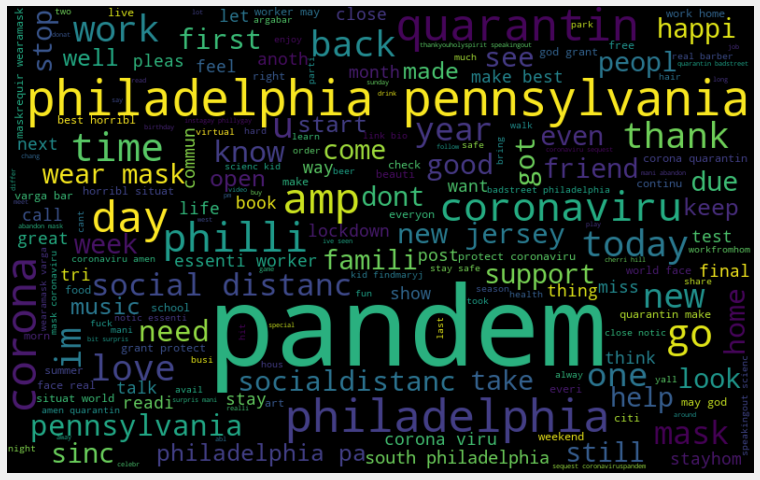

In [37]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

# size the plt object
plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [38]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001068C83BA00>>

In [39]:
from datetime import datetime
from dateutil.parser import parse


In [40]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
# Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [41]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,hair two weeks ago the maintenance halted beca...,wed mar 25 15:29:09 +0000 2020,"philadelphia, pa",frustrated urrrgh damnyoucovid19,0.15,-0.31666666666666665,negative,hair two week ago mainten halt corona day ...,2020-03-25 15:29:09,3
1,coronaviruscutz corona coronaviruspandemic wi...,sat mar 28 22:03:41 +0000 2020,"philadelphia, pa",coronaviruscutz corona coronaviruspandemic wic...,1.0,-0.25,negative,coronaviruscutz corona coronaviruspandem wicke...,2020-03-28 22:03:41,3
2,read thisfrom a dear trusted friend whose dear...,sun mar 22 10:41:26 +0000 2020,"king of prussia, pa",<na>,0.9,0.5,positive,read thisfrom dear trust friend whose dear fr...,2020-03-22 10:41:26,3


## Data preparation for further visualizations

In [42]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [43]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,<na>,0.056061
1,ambler,0.404167
2,ardmore,0.200758
3,barclay,0.041968
4,bellmawr,0.533333


<AxesSubplot:ylabel='place'>

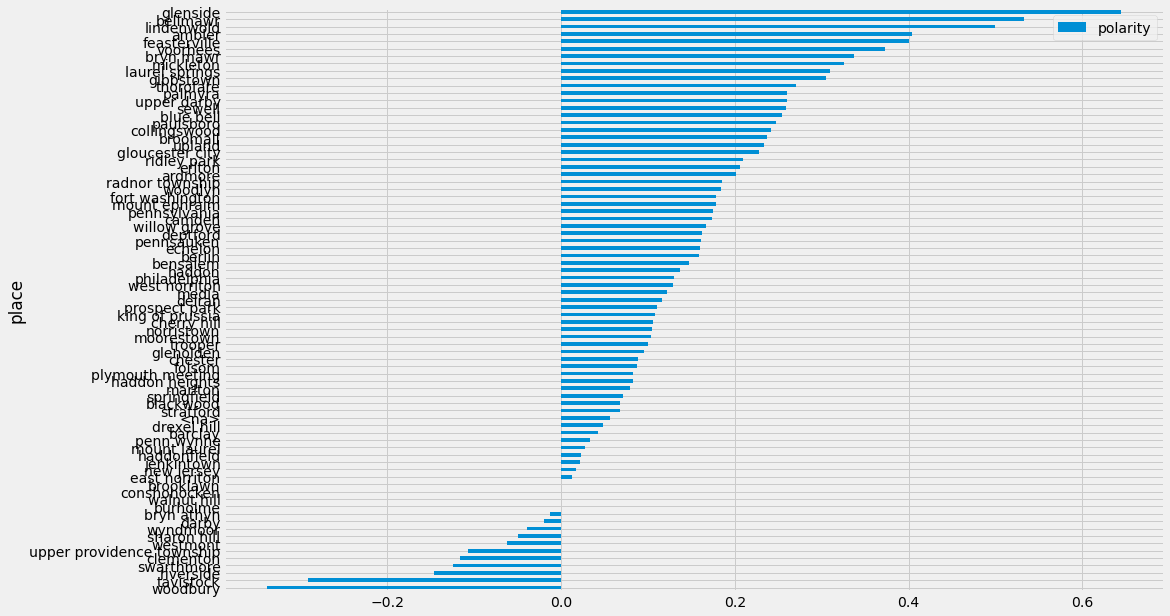

In [44]:
# Chart sentiments based on regions

#df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 10))





In [45]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.049718
1,4,0.140714
2,5,0.131708
3,6,0.112666
4,7,0.184960


<AxesSubplot:xlabel='month'>

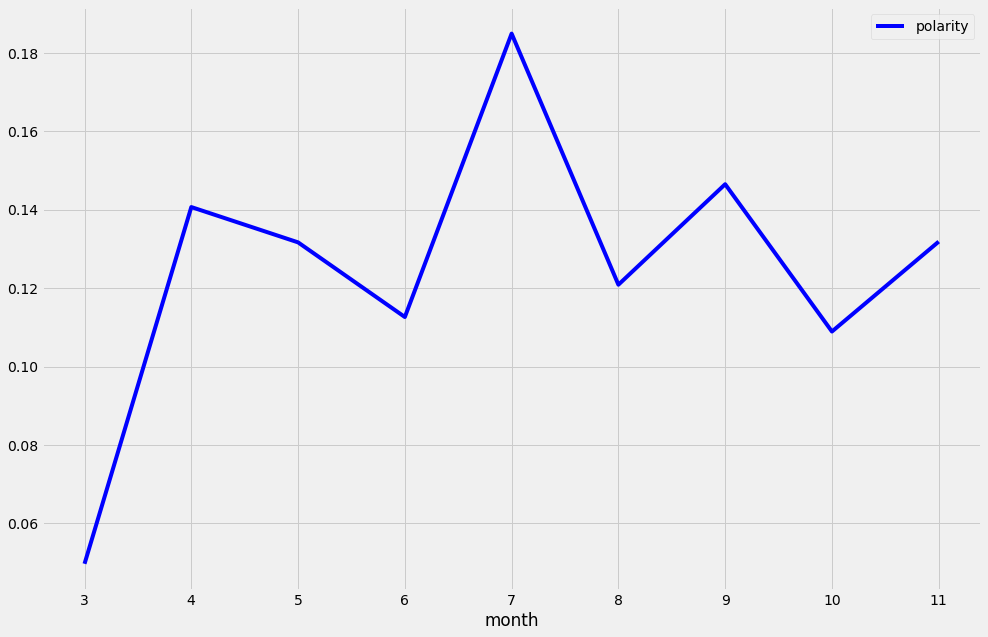

In [46]:
# Chart sentiments based on regions

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue")


## Extract Hashtags

In [47]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,hair two weeks ago the maintenance halted beca...,wed mar 25 15:29:09 +0000 2020,philadelphia,frustrated urrrgh damnyoucovid19,0.150000,-0.316667,negative,hair two week ago mainten halt corona day ...,2020-03-25 15:29:09,3
1,coronaviruscutz corona coronaviruspandemic wi...,sat mar 28 22:03:41 +0000 2020,philadelphia,coronaviruscutz corona coronaviruspandemic wic...,1.000000,-0.250000,negative,coronaviruscutz corona coronaviruspandem wicke...,2020-03-28 22:03:41,3
2,read thisfrom a dear trusted friend whose dear...,sun mar 22 10:41:26 +0000 2020,king of prussia,<na>,0.900000,0.500000,positive,read thisfrom dear trust friend whose dear fr...,2020-03-22 10:41:26,3
3,the puzzle master jan schopfer work piece pu...,sun mar 22 21:01:31 +0000 2020,barclay,puzzle puzzles puzzlesofinstagram jigsawpuzzle...,0.000000,0.000000,neutral,puzzl master jan schopfer work piec puzzl puz...,2020-03-22 21:01:31,3
4,this is how ive been keeping my cool as an ess...,wed apr 01 21:15:55 +0000 2020,philadelphia,<na>,0.325000,-0.025000,negative,ive keep cool essenti employe coronac...,2020-04-01 21:15:55,4
5,dear corona please let us alone we miss all of...,tue mar 24 16:08:49 +0000 2020,philadelphia,corona,0.000000,0.000000,neutral,dear corona pleas let us alon miss support...,2020-03-24 16:08:49,3
6,theres toilet paper rolls to win in this crane...,fri apr 03 23:36:27 +0000 2020,folsom,cranegame whytoiletpaper toiletpaper covid2020...,0.200000,0.383333,positive,there toilet paper roll win crane cranegam ...,2020-04-03 23:36:27,4
7,if only a selfie a day could keep the corona a...,fri apr 03 23:06:31 +0000 2020,stratford,<na>,0.727273,0.068182,positive,selfi day could keep corona away stratfor...,2020-04-03 23:06:31,4
8,zoom in to check out our great selection of ta...,fri mar 20 14:45:24 +0000 2020,pennsylvania,openfortakeout beertogo staysafe corona sucks,0.683333,0.333333,positive,zoom check great select takeout beer come...,2020-03-20 14:45:24,3
9,it was great to play some music with my oldest...,sat mar 21 01:09:13 +0000 2020,philadelphia,tangled disney iseethelight music corona quara...,0.750000,0.800000,positive,great play music oldest kid today rileyl...,2020-03-21 01:09:13,3


In [48]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [49]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [50]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
91,covid19,28
4,corona,22
15,coronavirus,20
18,philly,12
42,covid_19,11
6,wickedstylez2020,10
7,icedoutcutz,10
3,coronaviruscutz,9
19,philadelphia,9
23,quarantine,9


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

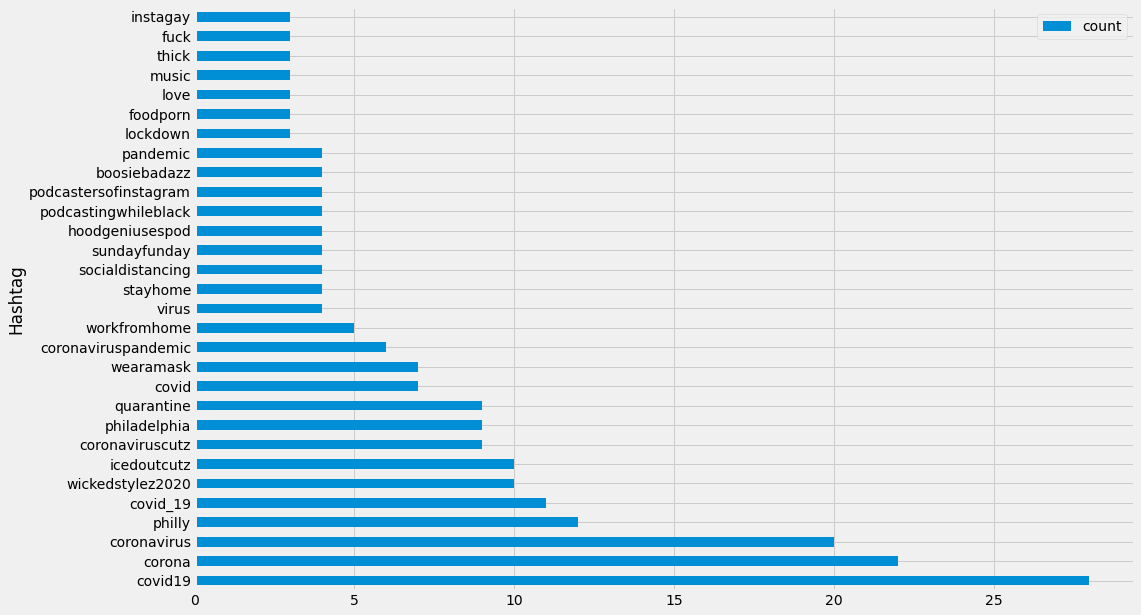

In [51]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))


In [52]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
98,covid19,128
90,coronavirus,55
16,quarantine,40
5,corona,38
96,socialdistancing,36
4,covid,33
272,wearamask,29
70,philadelphia,26
107,philly,24
10,staysafe,23


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

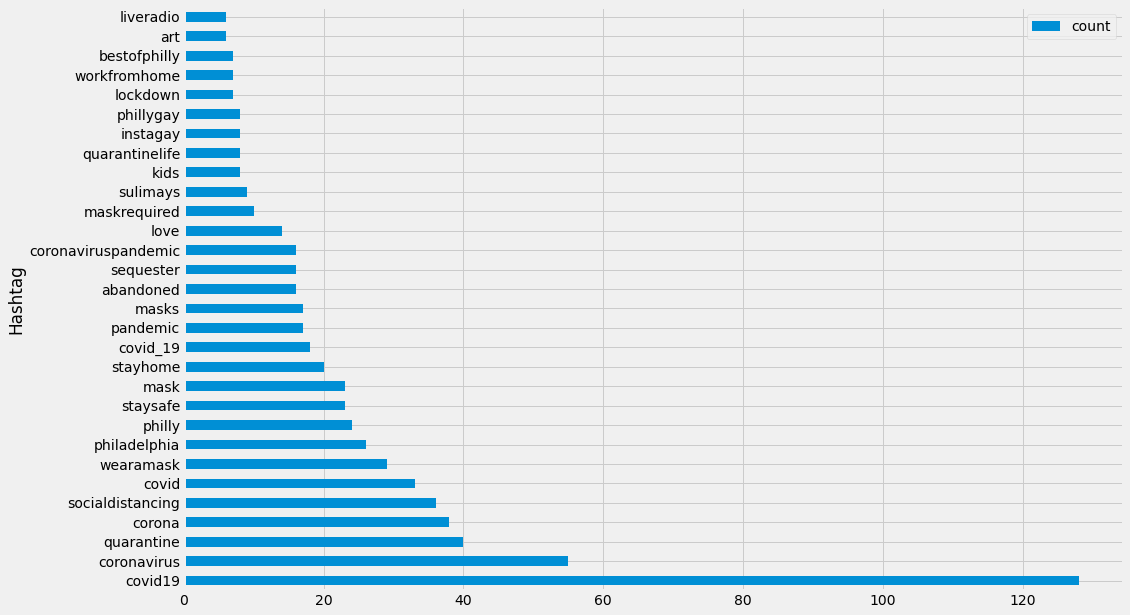

In [53]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))

In [54]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [55]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [56]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,hair two weeks ago the maintenance halted beca...,wed mar 25 15:29:09 +0000 2020,philadelphia,frustrated urrrgh damnyoucovid19,0.150,-0.316667,negative,hair two week ago mainten halt corona day ...,2020-03-25 15:29:09,3,0
1,coronaviruscutz corona coronaviruspandemic wi...,sat mar 28 22:03:41 +0000 2020,philadelphia,coronaviruscutz corona coronaviruspandemic wic...,1.000,-0.250000,negative,coronaviruscutz corona coronaviruspandem wicke...,2020-03-28 22:03:41,3,0
2,read thisfrom a dear trusted friend whose dear...,sun mar 22 10:41:26 +0000 2020,king of prussia,<na>,0.900,0.500000,positive,read thisfrom dear trust friend whose dear fr...,2020-03-22 10:41:26,3,0
3,the puzzle master jan schopfer work piece pu...,sun mar 22 21:01:31 +0000 2020,barclay,puzzle puzzles puzzlesofinstagram jigsawpuzzle...,0.000,0.000000,neutral,puzzl master jan schopfer work piec puzzl puz...,2020-03-22 21:01:31,3,0
4,this is how ive been keeping my cool as an ess...,wed apr 01 21:15:55 +0000 2020,philadelphia,<na>,0.325,-0.025000,negative,ive keep cool essenti employe coronac...,2020-04-01 21:15:55,4,0
